In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist

# loading MNIST Data, seperating in Training and Testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)

(60000, 28, 28)


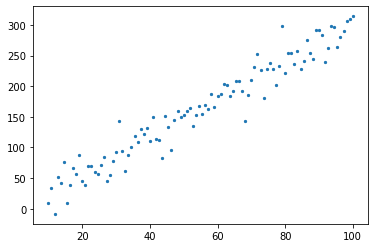

In [36]:
n = 100
x = np.linspace(10,100,n)
e = np.random.normal(0, 20, x.shape[0])
y = 3 * x + e
plt.scatter(x,y, s=5)

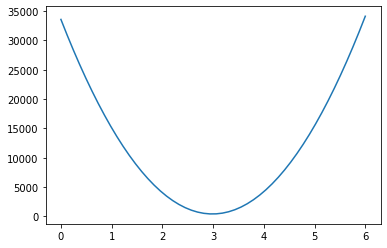

In [47]:
gradients = np.linspace(0,6,50)

sum_of_squares_list = []
for m in gradients:
    squared_residual = (x * m - y)**2
    cost = 1 / n * np.sum(squared_residual, axis=0)
    sum_of_squares_list.append(cost)
    
plt.plot(gradients, sum_of_squares_list)

This picture is labelled as number:  5


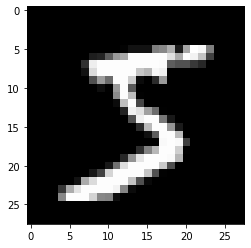

In [2]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
print('This picture is labelled as number: ', y_train[0])

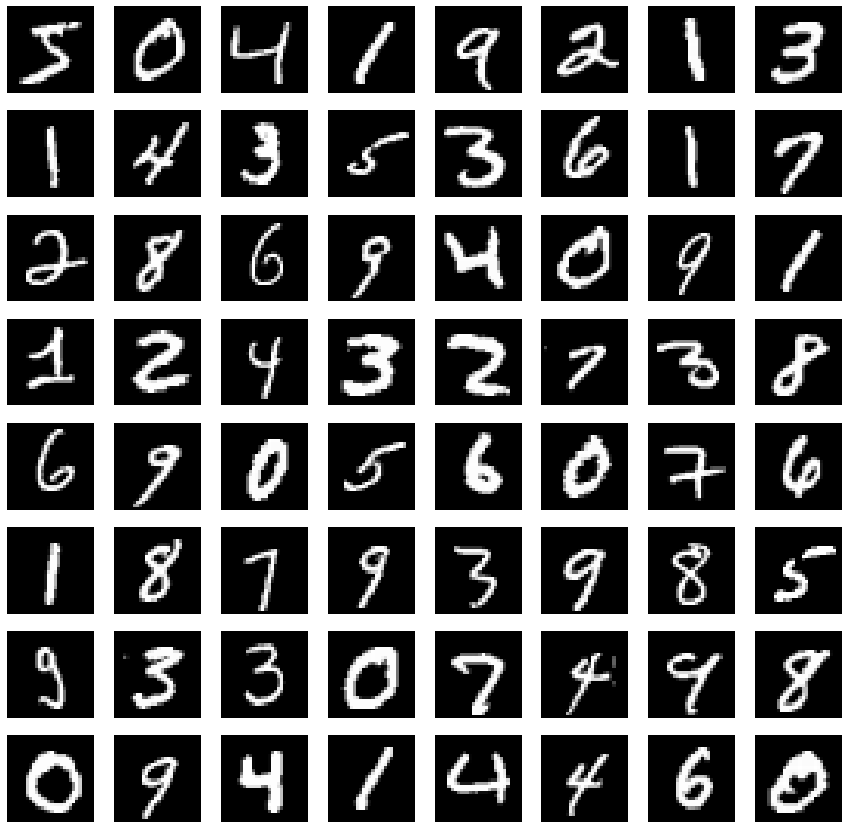

In [3]:
nrow = 8
ncol = 8
fig, _axs = plt.subplots(nrows=nrow, ncols=ncol)
fig.set_figheight(15)
fig.set_figwidth(15)
axs = _axs.flatten()
for i in range(nrow * ncol):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].axis('off')

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(60000, 28 * 28))

In [70]:
mnist_pca = PCA(n_components=2)
pc = mnist_pca.fit_transform(X_train_scaled)
pc.shape

(60000, 2)

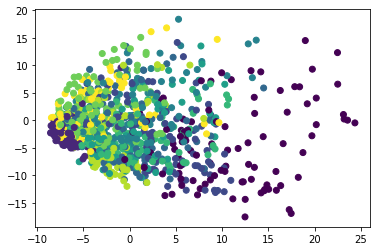

In [71]:
plt.scatter(pc[:1000,0],pc[:1000,1], c=y_train[:1000])

In [4]:
import tensorflow as tf

print("Num GPUs Available: ", 
len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Preparing Data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

n_classes = 10

Y_train = utils.to_categorical(y_train)
Y_test = utils.to_categorical(y_test)

number_of_epochs = 20
batch_size = 128

dimension_input = X_train.shape[1]

# Build a MLP
model = Sequential()
model.add(Dense(n_classes, input_shape=(784,), activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
log = model.fit(X_train,
                Y_train,
                batch_size=batch_size,
                epochs=number_of_epochs,
                verbose=True,
                validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.6845 - accuracy: 0.8302 - val_loss: 0.3851 - val_accuracy: 0.9018
Epoch 2/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3633 - accuracy: 0.9022 - val_loss: 0.3203 - val_accuracy: 0.9130
Epoch 3/20
469/469 [==============================] - 1s 1ms/step - loss: 0.3202 - accuracy: 0.9127 - val_loss: 0.2975 - val_accuracy: 0.9166
Epoch 4/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2999 - accuracy: 0.9173 - val_loss: 0.2855 - val_accuracy: 0.9208
Epoch 5/20
469/469 [==============================] - 1s 1ms/step - loss: 0.2879

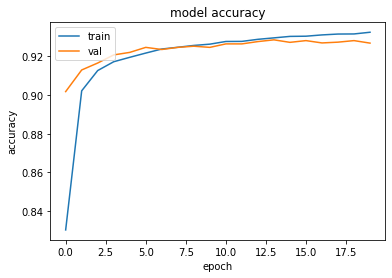

In [6]:
#import keras
history = log
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()